## 1. Multiclass Classification

In many real-world classification problems, we may need to classify data into more than two classes. This type of classification is termed **Multiclass Classification**.

The given space shows examples from three different classes. The classes are represented by the set $Y = \{1, 2, 3\}$.

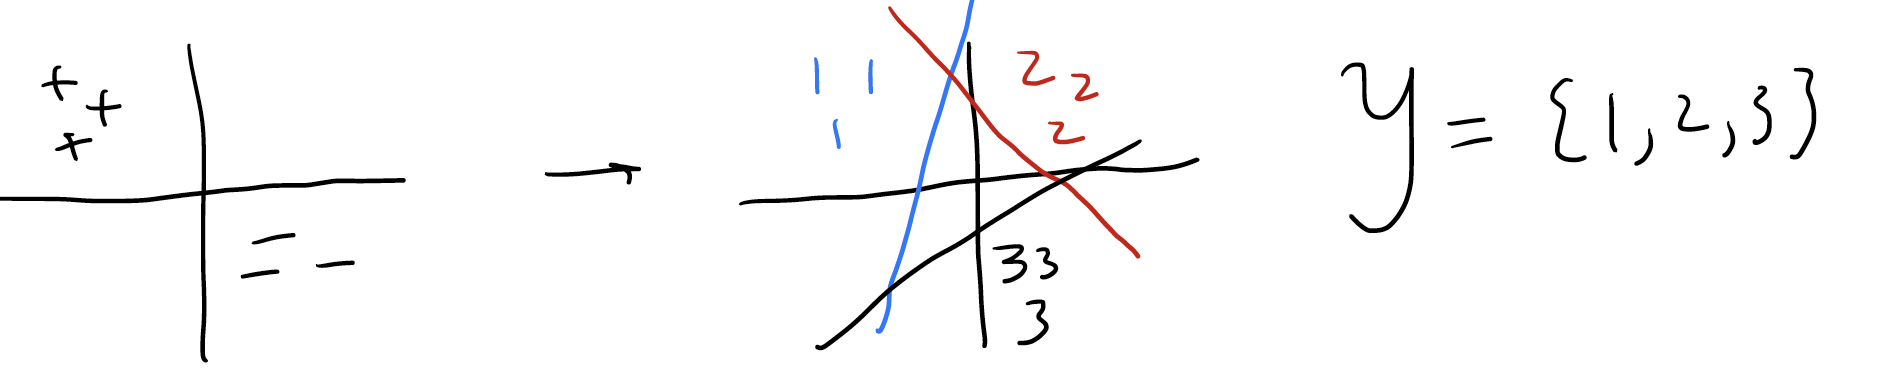

### Techniques

There are several ways to approach multiclass classification. Two common techniques are:


1. **One-vs-all (or One-vs-Rest)**
   
   For a classification problem with `n` classes, this technique trains `n` binary classifiers. For each classifier, the class is fitted against all the other classes.

   For example, consider we have three classes: 1, 2, and 3. For the "one-vs-all" approach:
   - Train a classifier with class 1 as positive and classes 2 and 3 as negative.
   - Train another classifier with class 2 as positive and classes 1 and 3 as negative.
   - Lastly, train a classifier with class 3 as positive and classes 1 and 2 as negative.


2. **Direct Multiclass Classification**

   Here, the model is trained to directly classify instances into one of the multiple classes.


### Representation

For multiclass classification, we can have:


1. One weight vector per class (different weights).
   The class for a given instance `x` is chosen by:
   
   $$
   \text{argmax}_{y \in Y} w_y^T f(x)
   $$


2. Different features (or a different feature function) for each class.
   The class is chosen by:
   
   $$
   \text{argmax}_{y \in Y} w^T f(x, y)
   $$


---


## 1.1 Topic Classification

Consider a situation where documents need to be classified into different topics. 

Given a document $x$ with the text: "too many drug trials, too few patients". The potential topics are $Y = \{\text{health, sports, science}\}$.

Feature Representation:
$f(x)$ can be a bag-of-unigrams, and for this example it's $\{\text{drug, patients, baseball}\}$.

For the given weights:
- $\mathbf{w}_{\text{health}} = [2, 5.6, -3]$
- $\mathbf{w}_{\text{sports}} = [1.2, -3.1, 5.7]$

Using the Direct Multiclass technique, the score for 'health' topic is 7.6, while the score for 'sports' topic is -1.9.

In Different Features per Class technique, $f(x, y)$ will replicate the feature vector for each class, with an indicator function determining the presence of a word given the hypothesized topic.


Consider the problem of classifying a sentence into topics such as "health", "sports", and "science". An example sentence is: 

`"Too many drug trials, too few patients"`

We can represent the sentence using a **bag-of-unigrams** approach.

### Feature Representation

For the given example, our feature representation is:

$$
f(x) = \text{bag-of-unigrams}(\text{"drug", "patients", "baseball"})
$$

### Weight Vector Calculation

Given the weight vectors for "health" and "sports", we can calculate the dot product to determine the class:

- For "health":
   
   $$
   w_{\text{health}} \cdot f(x) = 2 \times 1 + 5.6 \times 1 = 7.6
   $$

- For "sports":
   
   $$
   w_{\text{sports}} \cdot f(x) = 1.2 \times 1 - 3.1 \times 1 + 5.7 \times 0 = -1.9
   $$



## 2. Multiclass Perceptron and Logistic Regression

### Multiclass Perceptron

Multiclass Perceptron is an extension of the perceptron algorithm to handle multiple classes. The algorithm iteratively adjusts the weights for each class until a stopping criterion is met.

```python
for t in epochs:
    for i in data:
        y_pred = argmax_y w_y^T f(x)
        if y_pred != y(i):
            w_y_pred = w_y_pred - alpha * f(x)
            w_y(i) = w_y(i) + alpha * f(x)

```

Example:
- $[1,0,0]^`: y=1$ represents "health", noting issues like "too many drug trials, too few patients".
- $[1,0,1]$ : $y=2$ represents "sports", mentioning "baseball players taking drugs".
- For classification, if the model isn't confident, it defaults to predicting ' $y=3$ '.
- The weight vectors are represented as:
    - $w_{-} 1=[0,0,0]$ 
    - $w_{-} 2=[0,0,0]$ 
    - $w_{-} 3=[0,0,0]$ 

### Multiclass Logistic Regression
The probability of a data point x belonging to class y is defined by:

$ P(y|x) = \frac{e^{w^T f(x, y)}}{\sum_{y'\in Y} e^{w^T f(x, y')}}$

$P(y=y'|x) = \frac{e^{w^T f(x, y')}}{\sum_{y'\in Y} e^{w^T f(x, y'')}}$

In binary LR, the positive and negative classes can be represented as:

- $y=+1:  e^{w^T f(x)}$

- $y=-1:  1 - e^{w^T f(x)}$

And the gradient of the logistic regression loss (negative log likelihood) on a given example is:


$\frac{\partial}{\partial w} loss(x^{(i)}, y^{(i)}, w) = -f(x^{(i)}, y^{(i)}) + \sum_{y'\in Y} P(y'|x^{(i)}) f(x^{(i)}, y')$

Where:
- $f(x, y)$ is the feature vector for a given data point x and class y.
- $P(y|x^{(i)})$ represents the model's prediction for data point $x^{(i)}$ being in class y.

In stochastic gradient descent (SGD):

$\Delta w = -\alpha \frac{\partial}{\partial w}$


## 3. Multiclass Classification Examples

1. Text Classification:

- Article titled "A Cancer Conundrum: Too Many Drug Trials, Too Few Patients" is classified under "Health".
- Article titled "Yankees and Mets Are on Opposite Tracks This Subway Series" is classified under "Sports".
- Mention of datasets such as "20 Newsgroups", "Reuters", and "Yahoo! Answers" which seem to be related to text classification with ~20 classes.

2. Textual Entailment:

- Task involves determining the relationship between two sentences: Entailment, Contradiction, or Neutral.
- Example: "A soccer game with multiple males playing" ENTAILS "Some men are playing a sport".

3. Entity Disambiguation/Entity Linking:

- Example mentions "Armstrong" and the challenge is determining if it refers to "Lance Edward Armstrong", the cyclist, or "Armstrong County" in Pennsylvania.
- Mentions a challenge due to the vast number of potential entities, indicating 4.5 million classes (all articles in Wikipedia).

4. Authorship Attribution:

- Historical methods date back to the 1930s and 1940s, including heuristics based on stopword frequencies.
- Example projects: Differentiating between Shakespeare's plays and the Federalist papers.
- A modern example is determining the author of a tweet.

5. Authorship Attribution (SVM method):

- SVM with character 4-grams, words 2-grams through 5-grams.
- Shows a graph with accuracy percentages based on training set size.

6. Authorship Attribution (k-signature):

- Defines k-signature as an n-gram that appears in k% of the author's tweets but not in others, highlighting its effectiveness in determining authorship.
- Provides examples of unique character n-grams and word n-grams.



## 4. Fairness in Classification

- **Real-world Decisions:** Classifiers can influence decisions such as interviews, lending money, and monitoring suspicious online activities.
- **Ethical Implications:** Using classifiers to judge someone based on their face is discouraged.
- **Laws:** People making such decisions are bound by anti-discrimination laws. How can we ensure the fairness of classifiers?
- **Deployment:** Numerous factors must be considered when deploying classifiers, focusing on the ramifications of false positives and negatives.

#### Evaluating Fairness (Idea 1)

- **Beyond Accuracy:** Assessing classifiers goes beyond accuracy.
- **T. Anne Cleary (1966-1968):** A test is biased if it consistently makes errors for a subgroup compared to the aggregate.
- **Group Disparities:** A member of group π1 with higher test results than a member of π2 for the same ability implies that the test unfairly penalizes π2.
- **Fairness in Classification:** The ratio of predicted positives to actual positives must be roughly equal for all groups.
  
#### Evaluating Fairness (Idea 2)

- **Beyond Accuracy:** It's essential to look past just accuracy.
- **Thorndike, Petersen, and Novik:** Emphasize that fairness in classification requires the ratio of predicted positives to real positives to be almost equal for every group.
- **Account for Differences:** Classifiers must account for different positive rates among groups.

#### Discrimination (Idea 2)

- **Unintentional Discrimination:** Classifiers can inadvertently discriminate.
- **Features:** Some features, like dialect or ZIP code, can unintentionally disadvantage minority groups.
- **Real-world Case:** Amazon's AI tool showed bias against women.

#### Takeaways

- **Minority Groups:** Be aware of minority groups when designing and reviewing systems.
- **Fairness Criteria:** Ensure classifiers adhere to fairness criteria.
- **System Features:** Be cautious of features that might unintentionally correlate with protected classes or minority groups.
